In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Logistic regression

## 1. Binary classification

Logistic regression is an algorithm for binary classification.  
An example of binary classification below is the model to classify pass and fail based on the test scores.

![picture](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

As shown above, this model is represented by the graph with an "S" shape.
That is, to desribe the relationship between x and y, this type of graph is more appropriate than straight line functions.  
Therefore, we need an additional function, $f$, for $H(x) = f(Wx + b)$, instead of $H(x) = Wx + b$ used in linear regression.  
This function is a well-known **sigmoid function**.

## 2. Sigmoid function

$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# define Sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))     # when W = 1, b = 0

### 1) W = 1, b = 0

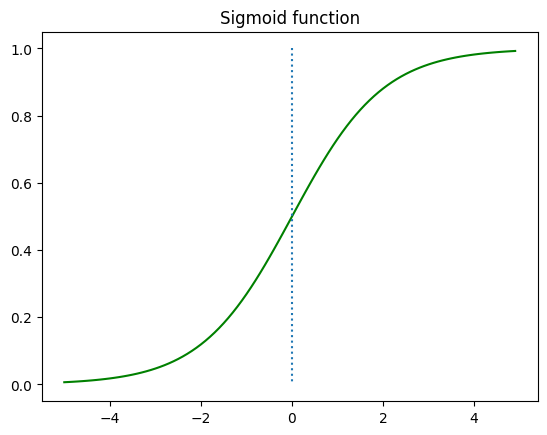

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1,0], ':')
plt.title('Sigmoid function')
plt.show()

### 2) Different W, b = 0

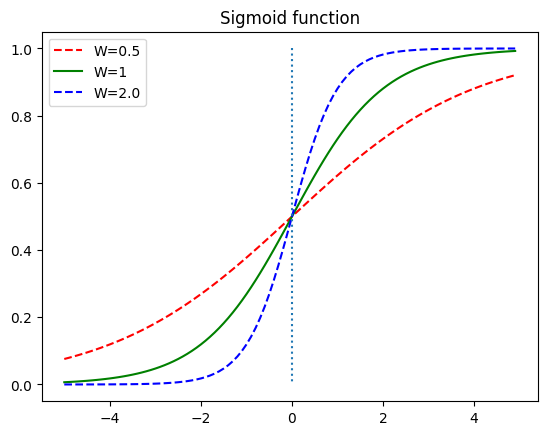

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)           # W = 0.5
y2 = sigmoid(x)               # W = 1
y3 = sigmoid(2*x)             # W = 2

plt.plot(x, y1, 'r', linestyle='--', label="W=0.5")
plt.plot(x, y2, 'g', label="W=1")
plt.plot(x, y3, 'b', linestyle='--', label="W=2.0")
plt.plot([0,0], [1,0], ':')
plt.title('Sigmoid function')
plt.legend()
plt.show()

### 3) Different b, W = 1

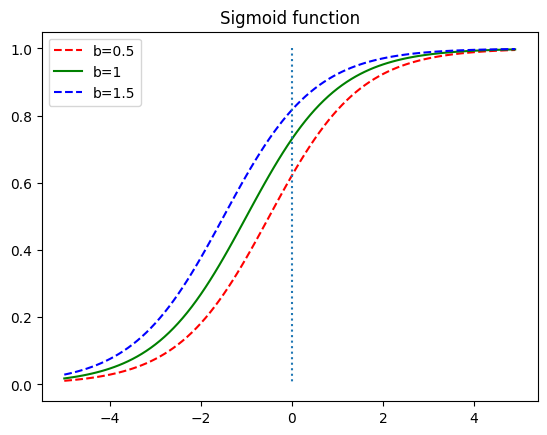

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)         # b = 0.5
y2 = sigmoid(x + 1)           # b = 1
y3 = sigmoid(x + 1.5)         # b = 1.5

plt.plot(x, y1, 'r', linestyle='--', label="b=0.5")
plt.plot(x, y2, 'g', label="b=1")
plt.plot(x, y3, 'b', linestyle='--', label="b=1.5")
plt.plot([0,0], [1,0], ':')
plt.title('Sigmoid function')
plt.legend()
plt.show()

The sigmoid function can be used for classification by interpreting the output as the probability of that label. Therefore, if it's larger (smaller) than 0.5, we could classify the data to that (the other) label.

## 3. Cost function

The cost function of linear regression:  
$cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$
  
If we use the same cost function for logistic regression along with  $H(x) = \mathrm{sigmoid}(Wx + b)$ instead of $H(x) = Wx + b$, the graph would be a non-convex shape below.  
![picture](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG)

Therefore, using this cost function would be problematic by finding $W$ at the local minimum rather than the global minimum.

Unlike linear regression, a sigmoid function has an output between 0 and 1. When the actual value is 1 and the predictive value is close to 0, the error should increase and vice versa. This could be represented with a log function.  
![picture](https://wikidocs.net/images/page/57805/%EA%B7%B8%EB%9E%98%ED%94%84.PNG)

The orange (green) curve indicates when the actual value is 1 (0).  
$\text{if } y=1 → \text{cost}\left( H(x), y \right) = -\log(H(x))$

$\text{if } y=0 → \text{cost}\left( H(x), y \right) = -\log(1-H(x))$  

Or we can integrate two equations above.  
$\text{cost}\left( H(x), y \right) = -[y\log H(x) + (1-y)\log (1-H(x))]$  

This function is called **negative log-likelihood** or **cross entropy**.

Therefore,  
$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}\log H(x^{(i)}) + (1-y^{(i)})\log (1-H(x^{(i)}))]$

$W = W - α\frac{∂}{∂W}cost(W)$

## 4. Logistic regression with PyTorch

### 1) From basic

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [12]:
# x and y data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [14]:
x_train.size(), y_train.shape

(torch.Size([6, 2]), torch.Size([6, 1]))

In [15]:
# instantiate W and b
W = torch.zeros((2,1), requires_grad=True) # size of W should be 2x1
b = torch.zeros(1, requires_grad=True)

In [16]:
# set the hypothesis
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

# or we can use 'sigmoid' function of PyTorch
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [19]:
# cost function or loss function
cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(cost.mean())

tensor(0.6931, grad_fn=<MeanBackward0>)


In [20]:
# or we can use 'binary_cross_entropy' function of PyTorch
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [21]:
# model training

# set the optimizer
optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # calculate the cost
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # update H(x) using cost
  optimizer.zero_grad()     # initiate the gradient to zeros
  cost.backward()           # calculate the gradient
  optimizer.step()          # update W and b

  # print log every 100 epoch
  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [22]:
print(hypothesis)

tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [23]:
# print the outcome as True or False
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [24]:
# print W and b after training
print(W), print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


(None, None)

### 2) From nn.Module

In [26]:
# instantiate the model using nn.Sequential()
model = nn.Sequential(
    nn.Linear(2, 1),      # input_dim = 2, output_dim = 1, W and b are initiated with random values
    nn.Sigmoid()          # output values must pass through the sigmoid function
)

In [28]:
# model training

# set the optimizer
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # calculate the cost
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # update H(x) using cost
  optimizer.zero_grad()     # initiate the gradient to zeros
  cost.backward()           # calculate the gradient
  optimizer.step()          # update W and b

  # print log every 100 epoch
  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])   # True if a predicted value > 0.5
    correct_prediction = prediction.float() == y_train    # True only if a prediction is correct
    accuracy = correct_prediction.sum().item() / len(correct_prediction)    # calculate the accuracy
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
      epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.527002 Accuracy 83.33%
Epoch  100/1000 Cost: 0.133369 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080169 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057659 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045154 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037163 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031602 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027503 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024353 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021855 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019825 Accuracy 100.00%


In [29]:
# check W and b
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2543, 1.5186]], requires_grad=True), Parameter containing:
tensor([-14.4881], requires_grad=True)]


In fact, logistic regression can be considered as a neural network model.  

![picture](https://wikidocs.net/images/page/58686/logistic_regression.PNG)

$H(x)=sigmoid(x_{1}w_{1} + x_{2}w_{2} + b)$

### 3) From Class

In [30]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):                 # forward method is called when model(x_train) is called. That is, model(x_train) == model.forward(x_train)
    return self.sigmoid(self.linear(x))

In [31]:
# model instance
model = BinaryClassifier()

In [32]:
# model training

# set the optimizer
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # calculate the cost
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # update H(x) using cost
  optimizer.zero_grad()     # initiate the gradient to zeros
  cost.backward()           # calculate the gradient
  optimizer.step()          # update W and b

  # print log every 100 epoch
  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])   # True if a predicted value > 0.5
    correct_prediction = prediction.float() == y_train    # True only if a prediction is correct
    accuracy = correct_prediction.sum().item() / len(correct_prediction)    # calculate the accuracy
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
      epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058858 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045878 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037649 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031951 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027766 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024558 Accuracy 100.00%
Epoch  900/1000 Cost: 0.022020 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019960 Accuracy 100.00%
